# Kernel Tricks para SVM

Importamos lo necesario

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Definimos función para graficar los resultados

In [ ]:
def plot_svm_decision_boundary(model, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title('Kernel Lineal')
    plt.show()

## 1) Kernel Linear

Generamos datos linealmente separables

In [ ]:
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

Dividimos los datos en entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Entrenamos con kernel lineal

In [ ]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

SVC(kernel='linear')

Predicimos y calculamos el accuracy

In [ ]:
y_pred = linear_svm.predict(X_test)
print(f"Precisión con kernel lineal: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Precisión con kernel lineal: 86.67%


Graficamos

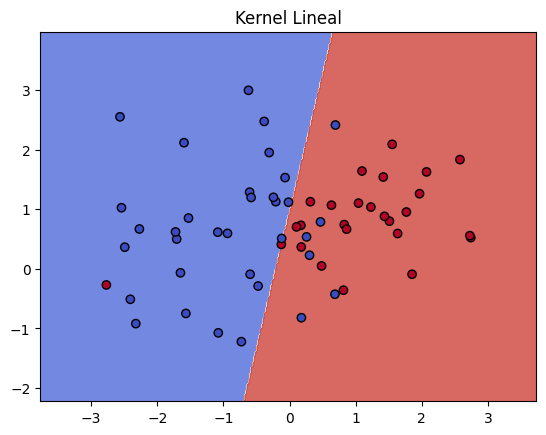

In [ ]:
plot_svm_decision_boundary(linear_svm, X_test, y_test)

## 2) Kernel RBF

Primero intentaremos aplicar el Kernel Linear

Para este ejemplo generaremos datos de lunas, estos datos no se pueden separar linealmente por lo que no tendremos buenos resultados con el kernel lineal.

In [ ]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

Dividimos los datos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Entrenamos con el kernel lineal

In [ ]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

SVC(kernel='linear')

Predecimos y calculamos el accuracy

In [ ]:
y_pred = linear_svm.predict(X_test)
print(f"Precisión con kernel lineal en datos de lunas: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Precisión con kernel lineal en datos de lunas: 88.33%


Graficamos los resultados

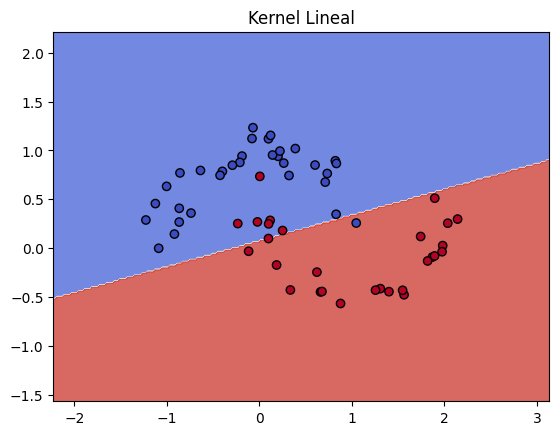

In [ ]:
plot_svm_decision_boundary(linear_svm, X_test, y_test)

Vemos que no es el mejor para este caso, intentemos con el Kernel RBF

Entrenamos con el kernel rbf

* gamma='auto': Fija el valor de gamma basado solo en el número de características, sin tener en cuenta la varianza de los datos. Es más simple, pero puede no funcionar bien en datasets donde las características tienen escalas muy diferentes.

*  gamma='scale': Ajusta el valor de gamma basándose en la varianza de los datos y el número de características. Suele ofrecer un mejor rendimiento en la mayoría de los casos, especialmente si los datos no están bien escalados o normalizados.

In [ ]:
rbf_svm = SVC(kernel='rbf', gamma='scale')
rbf_svm.fit(X_train, y_train)

SVC()

Predecimos y calculamos la precisión

In [ ]:
y_pred_rbf = rbf_svm.predict(X_test)
print(f"Precisión con kernel lineal en datos de lunas: {accuracy_score(y_test, y_pred_rbf) * 100:.2f}%")

Precisión con kernel lineal en datos de lunas: 98.33%


Graficamos los resultados

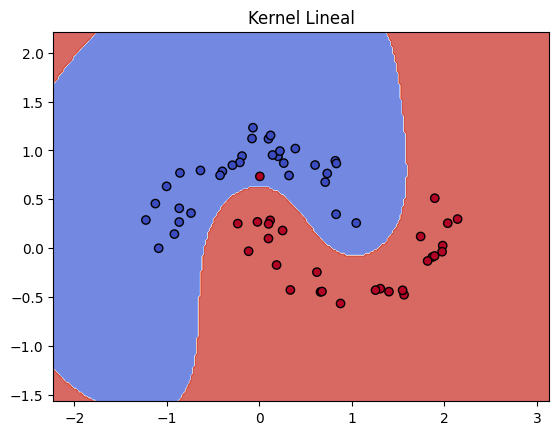

In [ ]:
plot_svm_decision_boundary(rbf_svm, X_test, y_test)

## 3) Kernel Poly

Ahora entrenaremos el anterior conjunto de datos pero con SVM con kernel polinomial de grado 3

In [ ]:
poly_svm = SVC(kernel='poly', degree=3)
poly_svm.fit(X_train, y_train)

SVC(kernel='poly')

Predecir y calcular precisión


In [ ]:
y_pred_poly = poly_svm.predict(X_test)
print(f"Precisión con kernel polinomial de grado 3 en datos de lunas: {accuracy_score(y_test, y_pred_poly) * 100:.2f}%")

Precisión con kernel polinomial de grado 3 en datos de lunas: 95.00%


Graficamos resultados


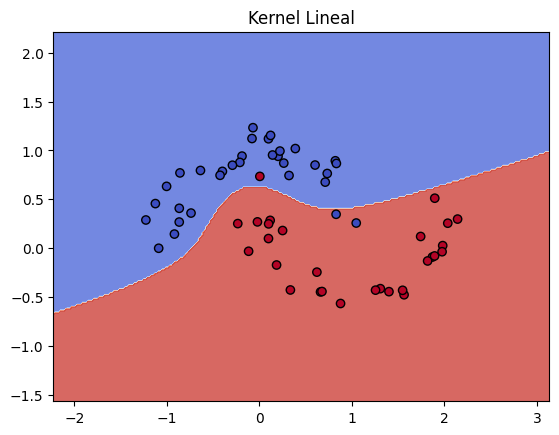

In [ ]:
plot_svm_decision_boundary(poly_svm, X_test, y_test)

## 4) Poly vs RBF

### CASO A

Generamos datos no lineales

In [ ]:
X, y = make_circles(n_samples=200, factor=0.3, noise=0.1, random_state=42)

Aplicamos kernel polinomial de grado 2

Precisión con kernel polinomial de grado 2 en datos no lineales: 100.00%


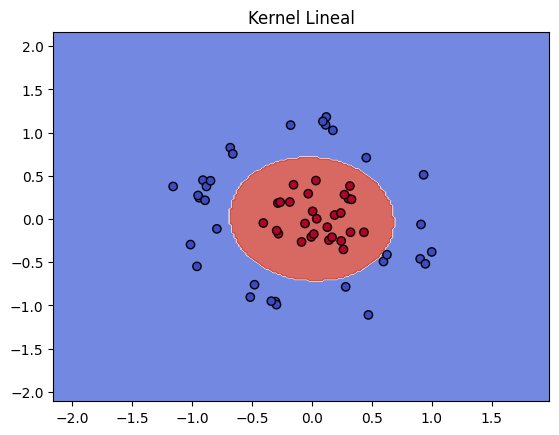

In [ ]:
# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos SVM con kernel polinomial de grado 2
poly_svm = SVC(kernel='poly', degree=2)
poly_svm.fit(X_train, y_train)

# Predecimos y calculamos precisión
y_pred = poly_svm.predict(X_test)
print(f"Precisión con kernel polinomial de grado 2 en datos no lineales: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Graficamos resultados
plot_svm_decision_boundary(poly_svm, X_test, y_test)


Aplicamos kernel rbf con gamma de scale

Precisión con kernel RBF en datos de círculos: 100.00%


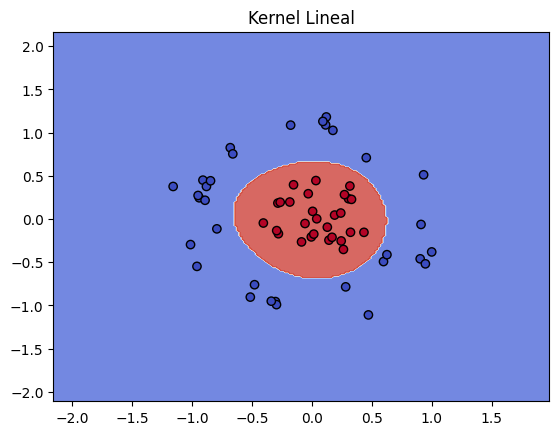

In [ ]:
# Generamos datos de círculos concéntricos
X, y = make_circles(n_samples=200, factor=0.3, noise=0.1, random_state=42)

# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos SVM con kernel RBF
rbf_svm = SVC(kernel='rbf', gamma='scale')
rbf_svm.fit(X_train, y_train)

# Predecimos y calcular precisión
y_pred = rbf_svm.predict(X_test)
print(f"Precisión con kernel RBF en datos de círculos: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Graficamos resultados
plot_svm_decision_boundary(rbf_svm, X_test, y_test)


### CASO B

Generamos datos no lineales complejos

In [ ]:
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, class_sep=0.2, random_state=42)

Aplicamos rbf con gamma auto

Precisión con kernel RBF en datos complejos: 61.67%


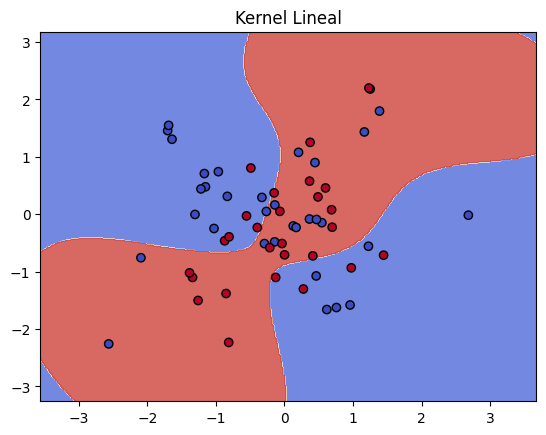

In [ ]:
# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos SVM con kernel RBF
rbf_svm = SVC(kernel="rbf", gamma='auto')
rbf_svm.fit(X_train, y_train)

# Predecimos y calcular precisión
y_pred = rbf_svm.predict(X_test)
print(f"Precisión con kernel RBF en datos complejos: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Graficamos resultados
plot_svm_decision_boundary(rbf_svm, X_test, y_test)


Aplicamos polinomial de 3 grados

Precisión con kernel RBF en datos complejos: 53.33%


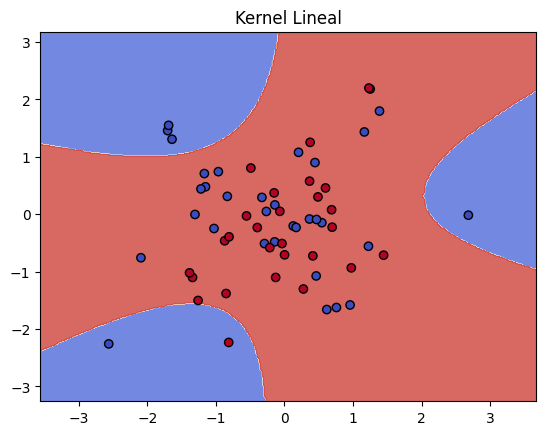

In [ ]:
# Entrenamos SVM con kernel RBF
poly_svm = SVC(kernel='poly', degree=3)
poly_svm.fit(X_train, y_train)

# Predecimos y calcular precisión
y_pred = poly_svm.predict(X_test)
print(f"Precisión con kernel RBF en datos complejos: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Graficamos resultados
plot_svm_decision_boundary(poly_svm, X_test, y_test)